In [1]:
# importo le librerie

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# carico i dati

Joined_data = pd.read_csv('drive/MyDrive/Tesina/Joined_Table.csv')

In [3]:
# calcolo correlazione tra tutte le colonne

cormat = Joined_data.corr()
cormat

,x1_actualposition,x1_actualvelocity,x1_actualacceleration,x1_commandposition,x1_commandvelocity,x1_commandacceleration,x1_currentfeedback,x1_dcbusvoltage,x1_outputcurrent,x1_outputvoltage,...,s1_outputpower,s1_systeminertia,m1_sequence_number,m1_current_feedrate,experiment_id,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
x1_actualposition,1.000000,0.038098,-0.027131,0.998961,0.033647,-0.040663,0.231986,-0.044866,0.012266,-0.043619,...,-0.018875,NaN,0.054435,-0.007085,0.006466,-0.004593,0.004789,0.003166,0.027518,0.013117
x1_actualvelocity,0.038098,1.000000,0.046440,0.043979,0.992937,-0.051882,0.712439,-0.053629,0.050677,-0.053903,...,-0.046668,NaN,-0.018595,-0.040379,0.019755,-0.041596,-0.016595,-0.004831,0.012316,0.022670
x1_actualacceleration,-0.027131,0.046440,1.000000,-0.027238,0.080375,0.284141,0.135264,0.066895,-0.020101,0.029031,...,0.029464,NaN,0.000265,0.042951,-0.010519,0.043104,0.003349,0.017580,-0.035384,-0.024660
x1_commandposition,0.998961,0.043979,-0.027238,1.000000,0.039535,-0.040480,0.235872,-0.045929,0.013863,-0.045246,...,-0.021176,NaN,0.053561,-0.008160,0.006146,-0.004761,0.004916,0.002841,0.028151,0.013739
x1_commandvelocity,0.033647,0.992937,0.080375,0.039535,1.000000,0.054917,0.732518,-0.048392,0.049673,-0.052415,...,-0.045658,NaN,-0.020064,-0.037021,0.019406,-0.038241,-0.016626,-0.005985,0.010165,0.022317
x1_commandacceleration,-0.040663,-0.051882,0.284141,-0.040480,0.054917,1.000000,0.105730,0.043905,-0.006510,0.021619,...,0.009532,NaN,-0.015397,0.024110,-0.000188,0.024086,-0.002482,-0.006767,-0.022351,-0.002270
x1_currentfeedback,0.231986,0.712439,0.135264,0.235872,0.732518,0.105730,1.000000,-0.057403,0.018518,-0.057537,...,-0.027304,NaN,-0.021603,-0.007091,0.006452,-0.007532,-0.008709,-0.003005,0.002546,0.004593
x1_dcbusvoltage,-0.044866,-0.053629,0.066895,-0.045929,-0.048392,0.043905,-0.057403,1.000000,-0.249175,0.678476,...,0.050586,NaN,-0.024086,0.224855,-0.124361,0.224883,0.091080,0.033432,-0.111687,-0.166147
x1_outputcurrent,0.012266,0.050677,-0.020101,0.013863,0.049673,-0.006510,0.018518,-0.249175,1.000000,-0.495033,...,-0.207538,NaN,0.056779,-0.745641,0.561370,-0.743941,-0.478182,-0.189848,0.240531,0.834870
x1_outputvoltage,-0.043619,-0.053903,0.029031,-0.045246,-0.052415,0.021619,-0.057537,0.678476,-0.495033,1.000000,...,0.099181,NaN,-0.046457,0.546004,-0.259545,0.546505,0.201521,0.087960,-0.253604,-0.374875


In [4]:
# tolgo le colonne per cui non esiste correlazione

Joined_data = Joined_data.drop(['z1_currentfeedback','z1_dcbusvoltage','z1_outputcurrent','z1_outputvoltage','s1_systeminertia'], axis=1)
cormat = Joined_data.corr()
cormat

,x1_actualposition,x1_actualvelocity,x1_actualacceleration,x1_commandposition,x1_commandvelocity,x1_commandacceleration,x1_currentfeedback,x1_dcbusvoltage,x1_outputcurrent,x1_outputvoltage,...,s1_outputvoltage,s1_outputpower,m1_sequence_number,m1_current_feedrate,experiment_id,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
x1_actualposition,1.000000,0.038098,-0.027131,0.998961,0.033647,-0.040663,0.231986,-0.044866,0.012266,-0.043619,...,-0.017993,-0.018875,0.054435,-0.007085,0.006466,-0.004593,0.004789,0.003166,0.027518,0.013117
x1_actualvelocity,0.038098,1.000000,0.046440,0.043979,0.992937,-0.051882,0.712439,-0.053629,0.050677,-0.053903,...,0.037876,-0.046668,-0.018595,-0.040379,0.019755,-0.041596,-0.016595,-0.004831,0.012316,0.022670
x1_actualacceleration,-0.027131,0.046440,1.000000,-0.027238,0.080375,0.284141,0.135264,0.066895,-0.020101,0.029031,...,0.031992,0.029464,0.000265,0.042951,-0.010519,0.043104,0.003349,0.017580,-0.035384,-0.024660
x1_commandposition,0.998961,0.043979,-0.027238,1.000000,0.039535,-0.040480,0.235872,-0.045929,0.013863,-0.045246,...,-0.024691,-0.021176,0.053561,-0.008160,0.006146,-0.004761,0.004916,0.002841,0.028151,0.013739
x1_commandvelocity,0.033647,0.992937,0.080375,0.039535,1.000000,0.054917,0.732518,-0.048392,0.049673,-0.052415,...,0.040385,-0.045658,-0.020064,-0.037021,0.019406,-0.038241,-0.016626,-0.005985,0.010165,0.022317
x1_commandacceleration,-0.040663,-0.051882,0.284141,-0.040480,0.054917,1.000000,0.105730,0.043905,-0.006510,0.021619,...,0.020498,0.009532,-0.015397,0.024110,-0.000188,0.024086,-0.002482,-0.006767,-0.022351,-0.002270
x1_currentfeedback,0.231986,0.712439,0.135264,0.235872,0.732518,0.105730,1.000000,-0.057403,0.018518,-0.057537,...,0.014122,-0.027304,-0.021603,-0.007091,0.006452,-0.007532,-0.008709,-0.003005,0.002546,0.004593
x1_dcbusvoltage,-0.044866,-0.053629,0.066895,-0.045929,-0.048392,0.043905,-0.057403,1.000000,-0.249175,0.678476,...,0.025865,0.050586,-0.024086,0.224855,-0.124361,0.224883,0.091080,0.033432,-0.111687,-0.166147
x1_outputcurrent,0.012266,0.050677,-0.020101,0.013863,0.049673,-0.006510,0.018518,-0.249175,1.000000,-0.495033,...,-0.015848,-0.207538,0.056779,-0.745641,0.561370,-0.743941,-0.478182,-0.189848,0.240531,0.834870
x1_outputvoltage,-0.043619,-0.053903,0.029031,-0.045246,-0.052415,0.021619,-0.057537,0.678476,-0.495033,1.000000,...,0.029592,0.099181,-0.046457,0.546004,-0.259545,0.546505,0.201521,0.087960,-0.253604,-0.374875


<Axes: >

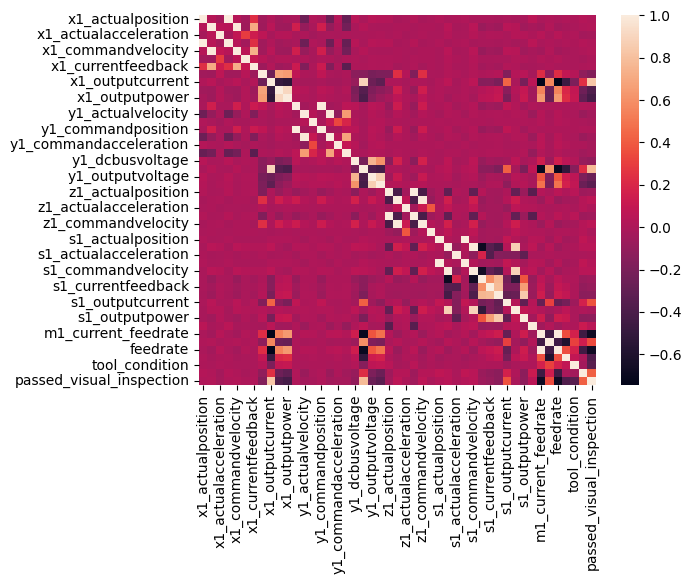

In [5]:
# stampo grafico

sns.heatmap(cormat)

In [6]:
# calcolo correlazione tra le tre colonne di tipo categorico (su cui devo creare classificatori) e tutte le altre colonne
cormat_1 = Joined_data.corr()[['tool_condition', 'machining_finalized', 'passed_visual_inspection']]
cormat_1

,tool_condition,machining_finalized,passed_visual_inspection
x1_actualposition,0.003166,0.027518,0.013117
x1_actualvelocity,-0.004831,0.012316,0.022670
x1_actualacceleration,0.017580,-0.035384,-0.024660
x1_commandposition,0.002841,0.028151,0.013739
x1_commandvelocity,-0.005985,0.010165,0.022317
x1_commandacceleration,-0.006767,-0.022351,-0.002270
x1_currentfeedback,-0.003005,0.002546,0.004593
x1_dcbusvoltage,0.033432,-0.111687,-0.166147
x1_outputcurrent,-0.189848,0.240531,0.834870
x1_outputvoltage,0.087960,-0.253604,-0.374875


In [7]:
# trovo le colonne con correlazione sufficientemente alta (superiore a 0.4 o inferiore a -0.4) rispetto a passed_visual_inspection

print('Feature correlate a passed_visual_inspection:')
for feature,valore in cormat.iterrows():
  if not feature in ['tool_condition', 'machining_finalized', 'passed_visual_inspection']:
      output = ''
      if valore['passed_visual_inspection'] > 0.4 or valore['passed_visual_inspection'] < -0.4 :
        output = f'{feature}'
      if output:
        print(output)

Feature correlate a passed_visual_inspection:
x1_outputcurrent
x1_outputpower
y1_outputcurrent
m1_current_feedrate
feedrate


In [8]:
# creo classificatore: Regressione Logistica per passed_visual_inspection

X = Joined_data[['feedrate', 'clamp_pressure', 'x1_outputcurrent', 'x1_outputpower', 'y1_outputcurrent', 'm1_current_feedrate']]
y = Joined_data['passed_visual_inspection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print('\n')

[[ 527   24]
 [ 111 2909]]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89       551
           1       0.99      0.96      0.98      3020

    accuracy                           0.96      3571
   macro avg       0.91      0.96      0.93      3571
weighted avg       0.97      0.96      0.96      3571





In [9]:
# creo classificatore: Random Forest per passed_visual_inspection

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_trainval, y_trainval)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       560
           1       0.99      0.99      0.99      3011

    accuracy                           0.98      3571
   macro avg       0.96      0.96      0.96      3571
weighted avg       0.98      0.98      0.98      3571



In [10]:
# creo classificatore: Gradient Boosting per passed_visual_inspection

gb = GradientBoostingClassifier()
gb.fit(X_trainval, y_trainval)
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       560
           1       0.99      0.98      0.99      3011

    accuracy                           0.98      3571
   macro avg       0.96      0.98      0.97      3571
weighted avg       0.98      0.98      0.98      3571

